In [2]:
pip install mediapipe-model-maker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━

In [3]:
from google.colab import files
import os
import tensorflow as tf
assert tf.__version__.startswith('2')

from mediapipe_model_maker import gesture_recognizer

import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [4]:
import kagglehub

dataset_path = kagglehub.dataset_download("innominate817/hagrid-sample-30k-384p")

print("Path to dataset files:", dataset_path)

100%|██████████| 823M/823M [00:10<00:00, 79.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5


In [5]:
!rm -r  /root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/reductionDataSet
!mkdir /root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/reductionDataSet

rm: cannot remove '/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/reductionDataSet': No such file or directory


In [6]:
import shutil

In [7]:
%matplotlib inline

In [7]:
# files.download('exported_model/gesture_recognizer.task')

FileNotFoundError: Cannot find file: exported_model/gesture_recognizer.task

## Static gesture for the project
- Opened hand (palm): eow
- index up: writing mod (word level)
- fist: delete word
- inverted open hand: eol
- 2: change keyboard (numbers, punctuation) and vice-versa


In [8]:
!rm -r  /root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/StaticGestureDataset
!mkdir /root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/StaticGestureDataset

rm: cannot remove '/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/StaticGestureDataset': No such file or directory


In [9]:
source_dir = "/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/hagrid-sample-30k-384p/hagrid_30k"
target_dir = "/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/StaticGestureDataset"

os.makedirs(target_dir, exist_ok=True)

In [10]:
import random

In [11]:
NUM_EXAMPLES = 1000

In [12]:
source_folder_stop = os.path.join(source_dir, "train_val_stop")
source_folder_palm = os.path.join(source_dir, "train_val_palm")

target_folder = os.path.join(target_dir, "open_hand")
os.makedirs(target_folder, exist_ok=True)

files_folder_stop = os.listdir(source_folder_stop)[:int(NUM_EXAMPLES/2)]
files_folder_palm = os.listdir(source_folder_palm)[:int(NUM_EXAMPLES/2)]

files_to_copy = files_folder_stop + files_folder_palm
random.shuffle(files_to_copy)

for file_name in files_to_copy:
    if file_name in files_folder_stop:
        source_file = os.path.join(source_folder_stop, file_name)
    elif file_name in files_folder_palm:
        source_file = os.path.join(source_folder_palm, file_name)
    target_file = os.path.join(target_folder, file_name)
    shutil.copy2(source_file, target_file)

In [13]:
source_folder_fist = os.path.join(source_dir, "train_val_fist")

target_folder = os.path.join(target_dir, "fist")
os.makedirs(target_folder, exist_ok=True)

files_folder_fist = os.listdir(source_folder_fist)[:NUM_EXAMPLES]

for file_name in files_folder_fist:
    source_file = os.path.join(source_folder_fist, file_name)

    target_file = os.path.join(target_folder, file_name)
    shutil.copy2(source_file, target_file)

In [14]:
source_folder_one = os.path.join(source_dir, "train_val_one")

target_folder = os.path.join(target_dir, "index_up")
os.makedirs(target_folder, exist_ok=True)

files_folder_one = os.listdir(source_folder_one)[:NUM_EXAMPLES]

for file_name in files_folder_one:
    source_file = os.path.join(source_folder_one, file_name)

    target_file = os.path.join(target_folder, file_name)
    shutil.copy2(source_file, target_file)

In [15]:
source_folder_stop_inv = os.path.join(source_dir, "train_val_stop_inverted")

target_folder = os.path.join(target_dir, "open_hand_inv")
os.makedirs(target_folder, exist_ok=True)

files_folder_stop_inv = os.listdir(source_folder_stop_inv)[:NUM_EXAMPLES]

for file_name in files_folder_stop_inv:
    source_file = os.path.join(source_folder_stop_inv, file_name)

    target_file = os.path.join(target_folder, file_name)
    shutil.copy2(source_file, target_file)

In [16]:
source_folder_peace = os.path.join(source_dir, "train_val_peace")
source_folder_two_up = os.path.join(source_dir, "train_val_two_up")

target_folder = os.path.join(target_dir, "two")
os.makedirs(target_folder, exist_ok=True)

files_folder_peace = os.listdir(source_folder_peace)[:int(NUM_EXAMPLES/2)]
files_folder_two_up = os.listdir(source_folder_two_up)[:int(NUM_EXAMPLES/2)]

files_to_copy = files_folder_peace + files_folder_two_up
random.shuffle(files_to_copy)

for file_name in files_to_copy:
    if file_name in files_folder_peace:
        source_file = os.path.join(source_folder_peace, file_name)
    elif file_name in files_folder_two_up:
        source_file = os.path.join(source_folder_two_up, file_name)
    target_file = os.path.join(target_folder, file_name)
    shutil.copy2(source_file, target_file)

In [17]:
none_folder = os.path.join(target_dir, "None")
os.makedirs(none_folder, exist_ok=True)

excluded_folders = ["train_val_fist", "train_val_stop", "train_val_palm", "train_val_one", "train_val_two_up", "train_val_stop_inverted", "train_val_peace"]
folders = [folder for folder in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, folder)) and folder not in excluded_folders]

print(len(folders))

11


In [18]:
# none_folder = os.path.join(target_dir, "None")
# os.makedirs(none_folder, exist_ok=True)

# excluded_folders = ["train_val_fist", "train_val_stop", "train_val_palm", "train_val_one", "train_val_two_up", "train_val_stop_inverted", "train_val_peace"]
# folders = [folder for folder in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, folder)) and folder not in excluded_folders]

for folder_name in folders:
    source_folder = os.path.join(source_dir, folder_name)

    files = os.listdir(source_folder)
    files_to_copy = files[:int(NUM_EXAMPLES/(len(folders)+1))]

    for file_name in files_to_copy:
        source_file = os.path.join(source_folder, file_name)
        target_file = os.path.join(none_folder, file_name)
        shutil.copy2(source_file, target_file)

    print(f"Copiati {len(files_to_copy)} file dalla cartella '{folder_name}' a '{none_folder}'")

print("Operazione completata.")

Copiati 83 file dalla cartella 'train_val_like' a '/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/StaticGestureDataset/None'
Copiati 83 file dalla cartella 'train_val_two_up_inverted' a '/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/StaticGestureDataset/None'
Copiati 83 file dalla cartella 'train_val_three2' a '/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/StaticGestureDataset/None'
Copiati 83 file dalla cartella 'train_val_four' a '/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/StaticGestureDataset/None'
Copiati 83 file dalla cartella 'train_val_peace_inverted' a '/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/StaticGestureDataset/None'
Copiati 83 file dalla cartella 'train_val_ok' a '/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/StaticGestureDataset/None'
Copiati 83 file dalla cartella 

In [19]:
file_count = len([file for file in os.listdir(none_folder) if os.path.isfile(os.path.join(none_folder, file))])
file_count
# print(int(NUM_EXAMPLES - file_count))

913

In [20]:
!wget https://storage.googleapis.com/mediapipe-tasks/gesture_recognizer/rps_data_sample.zip
!unzip rps_data_sample.zip
rps_dataset = "rps_data_sample"

--2025-01-17 17:25:36--  https://storage.googleapis.com/mediapipe-tasks/gesture_recognizer/rps_data_sample.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.139.207, 74.125.141.207, 173.194.210.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.139.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12332447 (12M) [application/zip]
Saving to: ‘rps_data_sample.zip’

rps_data_sample.zip 100%[===================>]  11.76M  --.-KB/s    in 0.1s    

2025-01-17 17:25:36 (86.7 MB/s) - ‘rps_data_sample.zip’ saved [12332447/12332447]

Archive:  rps_data_sample.zip
   creating: rps_data_sample/
   creating: rps_data_sample/paper/
   creating: rps_data_sample/rock/
   creating: rps_data_sample/scissors/
   creating: rps_data_sample/none/
  inflating: rps_data_sample/paper/77.jpg  
  inflating: rps_data_sample/paper/837.jpg  
  inflating: rps_data_sample/paper/176.jpg  
  inflating: rps_data_sample/paper/406.jpg  
  inflati

In [21]:
existing_files = []

none_folder = os.path.join(target_dir, "None")

source_folder_none = os.path.join(rps_dataset, "none")

all_images = [file for file in os.listdir(source_folder_none) if os.path.isfile(os.path.join(source_folder_none, file))]

random_images = random.sample(all_images, int(NUM_EXAMPLES - file_count))

for img_name in random_images:
    source_file = os.path.join(source_folder_none, img_name)
    target_file = os.path.join(none_folder, img_name)
    shutil.copy2(source_file, target_file)

    # print(f"Copiato il file '{img_name}' in '{none_folder}'")

print(int(NUM_EXAMPLES - file_count), " immagini casuali aggiunte alla cartella 'None'.")

87  immagini casuali aggiunte alla cartella 'None'.


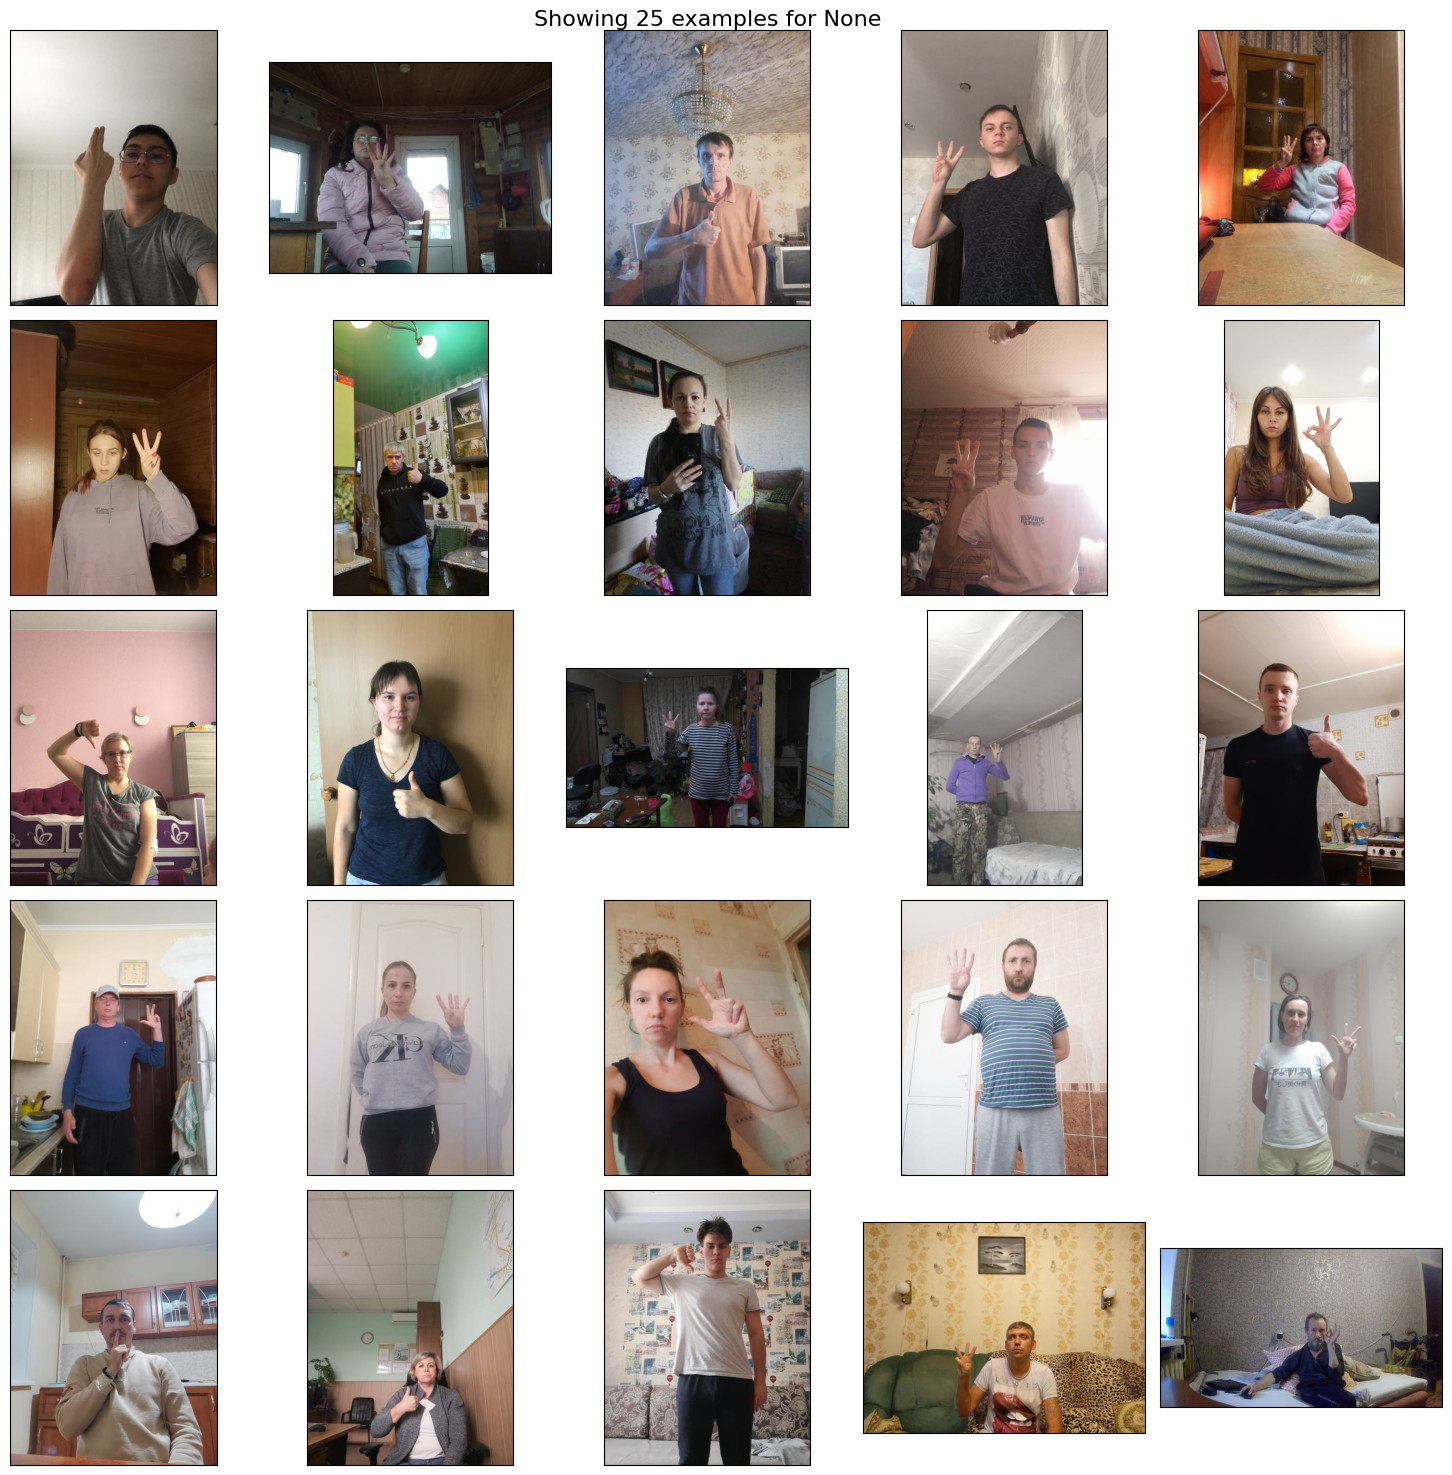

In [64]:
NUM_IMAGES = 25
IMAGES_PER_ROW = 5
label = "None"
label_dir = os.path.join(target_dir, label)

example_filenames = os.listdir(label_dir)[:NUM_IMAGES]

num_rows = (NUM_IMAGES + IMAGES_PER_ROW - 1) // IMAGES_PER_ROW

fig, axs = plt.subplots(num_rows, IMAGES_PER_ROW, figsize=(15, num_rows * 3))

for i in range(NUM_IMAGES):
    img_path = os.path.join(label_dir, example_filenames[i])
    row, col = divmod(i, IMAGES_PER_ROW)
    axs[row, col].imshow(plt.imread(img_path))
    axs[row, col].get_xaxis().set_visible(False)
    axs[row, col].get_yaxis().set_visible(False)

for i in range(NUM_IMAGES, num_rows * IMAGES_PER_ROW):
    row, col = divmod(i, IMAGES_PER_ROW)
    axs[row, col].axis('off')

fig.suptitle(f'Showing {NUM_IMAGES} examples for {label}', fontsize=16)
plt.tight_layout()
plt.show()

In [20]:
data = gesture_recognizer.Dataset.from_folder(
    dirname=target_dir,
    hparams=gesture_recognizer.HandDataPreprocessingParams()
)
train_data, rest_data = data.split(0.8)
validation_data_1, test_data_1 = rest_data.split(0.5)

In [21]:
hparams = gesture_recognizer.HParams(learning_rate=0.003, export_dir="exported_model", epochs=10)
model_options = gesture_recognizer.ModelOptions(dropout_rate=0.2)
options = gesture_recognizer.GestureRecognizerOptions(model_options=model_options, hparams=hparams)
model = gesture_recognizer.GestureRecognizer.create(
    train_data=train_data,
    validation_data=validation_data_1,
    options=options
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hand_embedding (InputLayer  [(None, 128)]             0         
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 custom_gesture_recognizer_  (None, 6)                 774       
 out (Dense)                                                     
                                                             

KeyboardInterrupt: 

In [ ]:
loss, accuracy = model_2.evaluate(test_data_1)
print(f"Test loss:{loss}, Test accuracy:{accuracy}")

9/9 [==============================] - 8s 68ms/step - loss: 0.2084 - categorical_accuracy: 0.8764
Test loss:0.20843610167503357, Test accuracy:0.876447856426239


In [ ]:
model.export_model()
!ls exported_model

Using existing files at /tmp/model_maker/gesture_recognizer/gesture_embedder.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/palm_detection_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/hand_landmark_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/canned_gesture_classifier.tflite
best_model_weights.data-00000-of-00001	checkpoint    gesture_recognizer.task  metadata.json
best_model_weights.index		epoch_models  logs


##Data augmentation
Trasformation:
- rotation
- scaling
- brightness and contrast
- color conversion
- blur
- noise
- sharpening

In [22]:
import cv2
import numpy as np

In [23]:
!rm -r  /root/.cache/kagglehub/datasets/augmented_dataset

rm: cannot remove '/root/.cache/kagglehub/datasets/augmented_dataset': No such file or directory


In [24]:
dataset_dir = "/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/StaticGestureDataset"
output_dir = "/root/.cache/kagglehub/datasets/augmented_dataset"

In [25]:
!ls root/.cache/kagglehub/datasets/augmented_dataset

ls: cannot access 'root/.cache/kagglehub/datasets/augmented_dataset': No such file or directory


In [26]:
os.makedirs(output_dir, exist_ok=True)

In [27]:
def random_rotation(image):
    angle = random.randint(-180, 180)
    h, w = image.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, matrix, (w, h))

def random_scaling(image):
    scale = random.uniform(0.8, 1.2)
    h, w = image.shape[:2]
    return cv2.resize(image, (int(w * scale), int(h * scale)))

def random_brightness_contrast(image):
    alpha = random.uniform(0.8, 1.2)
    beta = random.randint(-30, 30)
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

def random_color_conversion(image):
    conversions = [cv2.COLOR_BGR2HSV, cv2.COLOR_BGR2LAB, cv2.COLOR_BGR2YUV]
    conversion = random.choice(conversions)
    return cv2.cvtColor(image, conversion)

def random_blur(image):
    kernel_size = random.choice([3, 5])
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

def random_noise(image):
    noise = np.random.normal(0, 25, image.shape).astype(np.uint8)
    return cv2.add(image, noise)

def random_sharpening(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

In [28]:
for folder in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder)
    if os.path.isdir(folder_path):
        output_folder = os.path.join(output_dir, folder)
        os.makedirs(output_folder, exist_ok=True)

        images = [f for f in os.listdir(folder_path) if f.endswith((".png", ".jpg", ".jpeg"))]

        # Mischia le immagini
        random.shuffle(images)

        transformations = [
            random_rotation,
            random_scaling,
            random_brightness_contrast,
            random_color_conversion,
            random_blur,
            random_noise,
            random_sharpening,
        ]

        transformation_index = 0  # Indice per scegliere la trasformazione

        for i, image_name in enumerate(images):
            image_path = os.path.join(folder_path, image_name)
            image = cv2.imread(image_path)

            # Salva l'immagine originale nella cartella di output
            cv2.imwrite(os.path.join(output_folder, image_name), image)

            # Ogni 2 immagini originali, aggiungi un'immagine trasformata
            # if (i + 1) % 2 == 0:
            transformed_image = transformations[transformation_index](image)
            new_image_name = f"{os.path.splitext(image_name)[0]}_aug.jpg"
            new_image_path = os.path.join(output_folder, new_image_name)
            cv2.imwrite(new_image_path, transformed_image)

            # Aggiorna l'indice della trasformazione
            transformation_index = (transformation_index + 1) % len(transformations)

print("Data augmentation completata.")

Data augmentation completata.


In [29]:
file_count = len([file for file in os.listdir("/root/.cache/kagglehub/datasets/augmented_dataset/None" ) if os.path.isfile(os.path.join("/root/.cache/kagglehub/datasets/augmented_dataset/None" , file))])
file_count

2000

In [30]:
data = gesture_recognizer.Dataset.from_folder(
    dirname=output_dir,
    hparams=gesture_recognizer.HandDataPreprocessingParams()
)
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

In [31]:
hparams = gesture_recognizer.HParams(learning_rate=0.001, export_dir="exported_model_2", epochs=15, shuffle=True, batch_size=16, gamma=3)
model_options = gesture_recognizer.ModelOptions(dropout_rate=0.1, layer_widths=[256, 128])
options = gesture_recognizer.GestureRecognizerOptions(model_options=model_options, hparams=hparams)
model_2 = gesture_recognizer.GestureRecognizer.create(
    train_data=train_data,
    validation_data=validation_data,
    options=options
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hand_embedding (InputLayer  [(None, 128)]             0         
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 custom_gesture_recognizer_  (None, 256)               33024     
 0 (Dense)                                                       
                                                             

In [32]:
loss, accuracy = model_2.evaluate(test_data)
print(f"Test loss:{loss}, Test accuracy:{accuracy}")

27/27 [==============================] - 6s 24ms/step - loss: 0.1259 - categorical_accuracy: 0.8873
Test loss:0.12592071294784546, Test accuracy:0.8873239159584045


In [35]:
!rm -r exported_model_2

In [36]:
model_2.export_model()
!ls exported_model_2

Using existing files at /tmp/model_maker/gesture_recognizer/gesture_embedder.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/palm_detection_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/hand_landmark_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/canned_gesture_classifier.tflite
gesture_recognizer.task  metadata.json
